In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
from src.test import Tester

In [3]:
import numpy as np
from PIL import Image

In [4]:
from src.datasets import ALOVDataset

In [5]:
from torchvision import transforms

In [6]:
from src.helper import FromTensor, ToTensor, Normalize, show_batch

In [7]:
%matplotlib inline

In [90]:
model_weights ='../model_n_epoch_30_loss_6.043.pth'
save_directory = ''
data_directory ='../ALOV/Frames/01-Light/01-Light_video00001/'

In [91]:
transform = transforms.Compose([Normalize(), ToTensor()])
alov = ALOVDataset('../ALOV/Frames/',
                            '../ALOV/GT/',
                            transform)

In [92]:
from_tensor = FromTensor()

In [94]:
ix = from_tensor(alov[0])

In [93]:
alov.x[0]

array([ '../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/00000001.jpg',
       '../ALOV/Frames/13-ZoomingCamera/13-ZoomingCamera_video00028/00000006.jpg'],
      dtype='<U78')

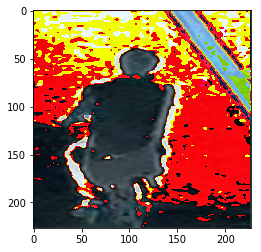

In [95]:
plt.imshow(ix['currimg'])

In [13]:
ix['currbb']

array([  5.05453348,   4.21168375,  16.45497704,  15.58989811], dtype=float32)

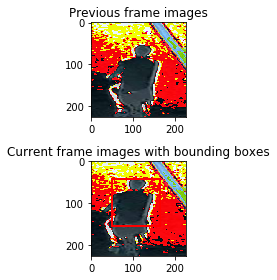

In [32]:
show_batch(alov[0])

In [86]:
img = Image.open('../ALOV/Frames/01-Light/01-Light_video00001/00000001.jpg')

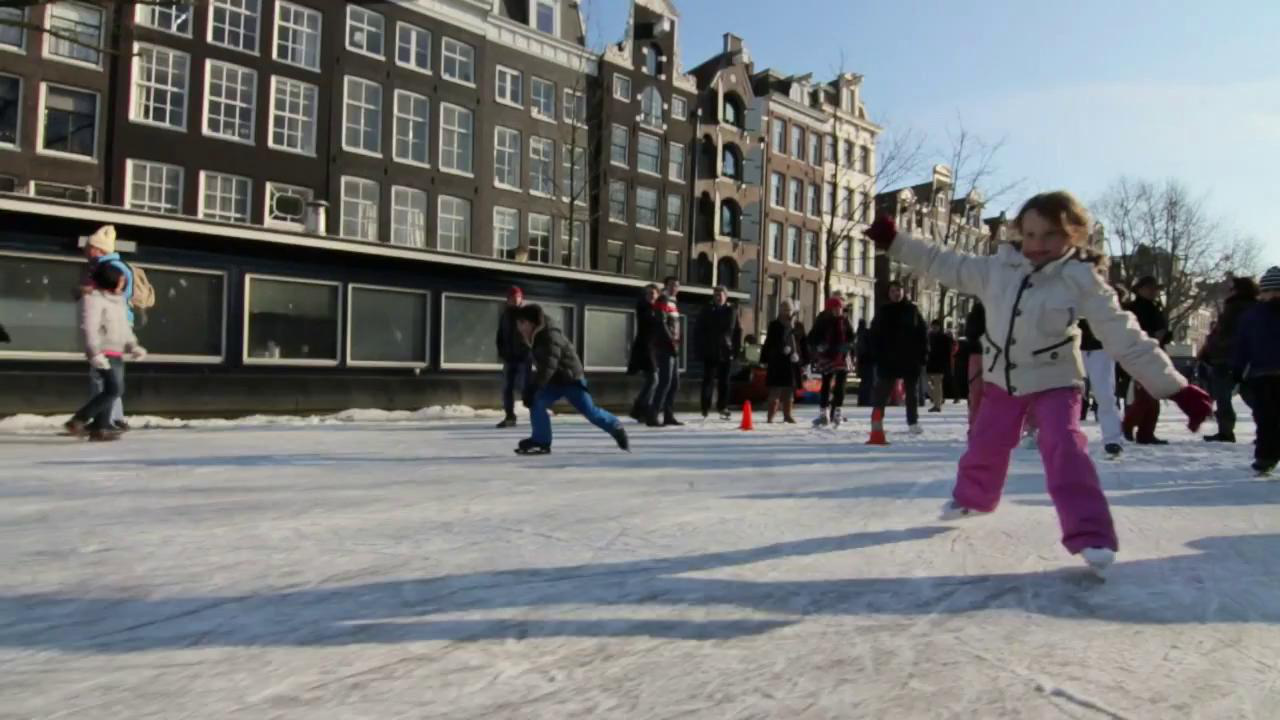

In [88]:
img

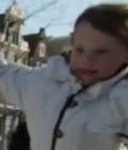

In [89]:
Image.open('../GOTURN-Tensorflow/test_example/searching/000000.jpg')

In [96]:
ann = '1 1080.2 187.84 1012.9 187.84 1012.9 269.56 1080.2 269.56'
ann = ann.strip().split(' ')
left = min(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
top = min(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
right = max(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
bottom = max(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
init_box = [left, top, right, bottom]

In [97]:
init_box

[1012.9, 187.84, 1080.2, 269.56]

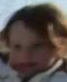

In [98]:
img.crop(init_box)

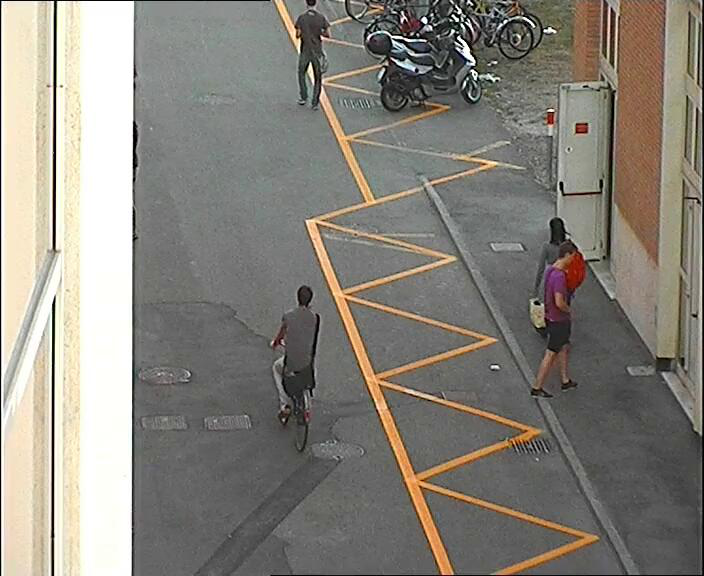

In [19]:
img

In [99]:
tester = Tester(data_directory, model_weights, np.array(init_box), save_directory)

In [51]:
len(tester.x)

247

In [100]:
tester[0]

{'currbb': 
  101.2900
   18.7840
  108.0200
   26.9560
 [torch.FloatTensor of size 4], 'currimg': 
 ( 0 ,.,.) = 
    17   48   48  ...    68   69   34
    35   71   71  ...    96   97   56
    35   71   71  ...    96   97   56
       ...         ⋱        ...      
   -96  -94  -93  ...     4    4  -18
   -96  -94  -94  ...     4    4  -18
   -98  -96  -96  ...   -10  -10  -29
 
 ( 1 ,.,.) = 
    22   58   58  ...    71   71   33
    44   85   85  ...   101  102   57
    44   85   85  ...   101  102   57
       ...         ⋱        ...      
  -108 -105 -104  ...    -9   -9  -31
  -108 -105 -105  ...    -9   -9  -31
  -109 -108 -108  ...   -23  -23  -42
 
 ( 2 ,.,.) = 
    30   70   70  ...    77   77   37
    55  100  100  ...   109  110   62
    54  100  100  ...   109  110   62
       ...         ⋱        ...      
  -118 -116 -115  ...    -5   -6  -31
  -118 -116 -116  ...    -5   -6  -30
  -119 -118 -118  ...   -21  -22  -43
 [torch.FloatTensor of size 3x227x227], 'previmg': 
 ( 0

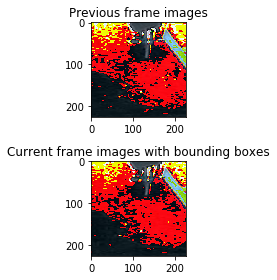

In [25]:
show_batch(tester[75])

In [47]:
tester.prev_rectev = tester.init_bbox

In [34]:
tester[2]

{'currbb': 
  27.8800
  28.6480
  32.4000
  37.5200
 [torch.FloatTensor of size 4], 'currimg': 
 ( 0 ,.,.) = 
   -28    4    4  ...    -6   -7  -37
   -19   18   18  ...    11   10  -25
   -19   18   18  ...    11   10  -24
       ...         ⋱        ...      
   -43  -17  -16  ...   -21  -19  -44
   -44  -19  -18  ...   -17  -14  -41
   -52  -29  -29  ...   -20  -17  -43
 
 ( 1 ,.,.) = 
   -40   -7   -7  ...   -17  -19  -49
   -30    7    7  ...     0   -1  -36
   -30    7    7  ...     0   -1  -36
       ...         ⋱        ...      
   -56  -30  -29  ...   -34  -32  -57
   -57  -32  -31  ...   -30  -27  -54
   -65  -42  -42  ...   -33  -30  -56
 
 ( 2 ,.,.) = 
   -47  -14  -14  ...   -26  -27  -57
   -37    0    0  ...    -9  -10  -45
   -37    0    0  ...    -9  -10  -44
       ...         ⋱        ...      
   -62  -36  -35  ...   -40  -38  -63
   -63  -38  -37  ...   -36  -33  -60
   -71  -48  -48  ...   -39  -36  -62
 [torch.FloatTensor of size 3x227x227], 'previmg': 
 ( 0 ,.,

In [63]:
tester.prev_rect = tester.init_bbox
tester.anim_idx = 0

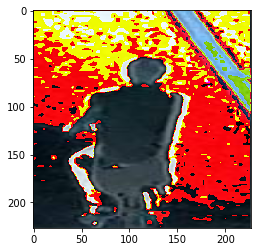

In [64]:
plt.imshow(from_tensor(tester[0])['currimg'])

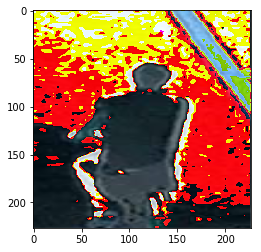

In [65]:
plt.imshow(from_tensor(tester[0])['previmg'])

In [68]:
tester[0]['currbb']


 27.8800
 28.6480
 32.4000
 37.5200
[torch.FloatTensor of size 4]

Testing frame # 0
Sample:  {'previmg': 
( 0 ,.,.) = 
  -27    6    5  ...     1   -1  -32
  -17   20   20  ...    13   12  -23
  -17   20   20  ...    13   13  -22
      ...         ⋱        ...      
  -42  -15  -16  ...   -19  -18  -44
  -43  -17  -18  ...    -9   -9  -38
  -51  -28  -28  ...   -12  -12  -40

( 1 ,.,.) = 
  -40   -7   -8  ...   -11  -12  -44
  -30    7    7  ...     2    1  -35
  -30    7    7  ...     2    2  -34
      ...         ⋱        ...      
  -55  -28  -29  ...   -32  -31  -57
  -56  -30  -31  ...   -22  -22  -51
  -64  -41  -41  ...   -25  -25  -53

( 2 ,.,.) = 
  -46  -13  -14  ...   -19  -20  -52
  -36    1    1  ...    -7   -8  -43
  -36    1    1  ...    -7   -7  -42
      ...         ⋱        ...      
  -61  -34  -35  ...   -38  -37  -63
  -62  -36  -37  ...   -28  -28  -57
  -70  -47  -47  ...   -31  -31  -59
[torch.FloatTensor of size 3x227x227]
, 'currimg': 
( 0 ,.,.) = 
  -28    4    4  ...    -6   -7  -37
  -19   18   18  ...    11   10  -25
  -

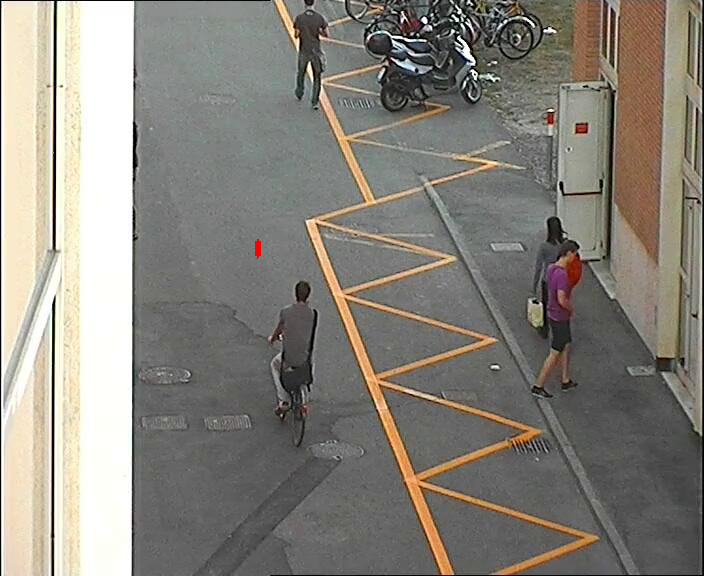

In [59]:
tester.test(animated=False)

In [26]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

In [27]:
display_animation(tester.animated_test())

Testing frame # 1
Testing frame # 2


ValueError: not enough values to unpack (expected 2, got 0)